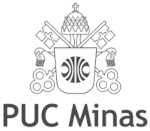

## Programa de Pós Graduação em Informática

### Disciplina: Indução de Regras e Árvores de Decisão

### Aluno: Felipe A. L. Reis

In [75]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from irad_plot import seaborn_plot, seaborn_bar, seaborn_bar_hue

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---
# Aprendizado de Dados de Saúde Pública da Coréia do Sul

O trabalho a seguir foi desenvolvido para tarefas de aprendizado de máquinas em uma base de dados de saúde pública da Coréia.

A base é denominada **[National Health Insurance Corporation_Health Checkup Information](https://www.data.go.kr/data/15007122/fileData.do#/layer_data_infomation)** (tradução automática de coreano para inglês) e está disponível no [portal público de dados do governo da Coréia](https://www.data.go.kr/data/15007122/fileData.do#/layer_data_infomation).

A base de dados foi obtida à partir da base **[Body signal of smoking](https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking)**, disponível no [Kaglle](https://www.kaggle.com/). Essa última base corresponde a uma versão simplificada da base original.

A base [National Health Insurance Corporation_Health Checkup Information](https://www.data.go.kr/data/15007122/fileData.do#/layer_data_infomation) contém 1.000.000 de registros de check-up de saúde e seus dependentes com mais de 40 anos, membros locais que são chefes de família e membros locais com mais de 40 anos e aqueles que atingiram a idade de 40 e 66 entre os sujeitos a check-up geral de saúde.

São dados abertos que consistem em informações básicas (sexo, idade, código do teste, etc.) e detalhes do exame (altura, peso, colesterol total, hemoglobina, etc.).

As informações de uso de cigarros não englobam cigarros eletrônicos.

---
## Carregamento da Base de Dados

In [76]:
def load_data():
    data = pd.read_csv('dataset/smoking-dataset-initial.csv', delimiter=',')
        
    # Remove duplicate
    data = data[~data.ID.duplicated(keep='first')]
    
    return data

data = load_data()
data

,Unnamed: 0,ID,gender,height,weight,waist,sight_left,sight_right,hearing_left,hearing_right,...,smoking_status,drinking,gender_num,age,drink,smoking,dentist,caries,imc,imc_grau
0,0,1,M,165,60,72.1,1.2,1.5,1.0,1.0,...,1.0,0.0,1,40,N,NF,N,NaN,22.038567,N
1,1,2,F,150,65,81.0,0.8,0.8,1.0,1.0,...,1.0,0.0,2,60,N,NF,N,NaN,28.888889,SP
2,2,3,F,155,55,70.0,0.6,0.7,1.0,1.0,...,1.0,0.0,2,55,N,NF,N,NaN,22.892820,N
3,3,4,M,160,70,90.8,1.0,1.0,1.0,2.0,...,1.0,0.0,1,60,N,NF,S,N,27.343750,SP
4,4,5,F,155,50,75.2,1.5,1.2,1.0,1.0,...,1.0,0.0,2,55,N,NF,N,NaN,20.811655,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999652,999995,999996,F,145,55,81.0,0.9,1.0,1.0,1.0,...,1.0,0.0,2,60,N,NF,N,NaN,26.159334,SP
999653,999996,999997,F,160,55,76.5,1.5,1.5,1.0,1.0,...,1.0,1.0,2,55,S,NF,N,NaN,21.484375,N
999654,999997,999998,M,175,70,85.0,1.2,1.2,1.0,1.0,...,1.0,1.0,1,40,S,NF,N,NaN,22.857143,N
999655,999998,999999,F,160,70,91.0,0.6,0.5,1.0,1.0,...,1.0,0.0,2,40,N,NF,N,NaN,27.343750,SP


---
## Descrição dos Dados

In [77]:
#imprime informações básicas sobre os dados, como tipo e quantidade de dados ausentes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999657 entries, 0 to 999656
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                999657 non-null  int64  
 1   ID                        999657 non-null  int64  
 2   gender                    999657 non-null  object 
 3   height                    999657 non-null  int64  
 4   weight                    999657 non-null  int64  
 5   waist                     999551 non-null  float64
 6   sight_left                999401 non-null  float64
 7   sight_right               999406 non-null  float64
 8   hearing_left              999436 non-null  float64
 9   hearing_right             999428 non-null  float64
 10  systolic_blood_pressure   992125 non-null  float64
 11  diastolic_blood_pressure  992123 non-null  float64
 12  glucose                   992055 non-null  float64
 13  total_cholesterol         402143 non-null  f

In [78]:
#imprime estatísticas básicas, como o número de elementos, média, desvio padrão, valor mínimo/máximo e percentis
data.describe()

,Unnamed: 0,ID,height,weight,waist,sight_left,sight_right,hearing_left,hearing_right,systolic_blood_pressure,...,urine_protein,serum_creatinine,ast_sgot,alt_sgpt,gama_gtp,smoking_status,drinking,gender_num,age,imc
count,999657.000000,999657.000000,999657.000000,999657.000000,999551.000000,999401.000000,999406.000000,999436.000000,999428.000000,992125.000000,...,987521.000000,992055.000000,992056.000000,992055.000000,992054.00000,999657.000000,999508.000000,999657.000000,999657.000000,999657.000000
mean,499999.034222,500000.034222,160.964081,63.060825,82.357085,0.933062,0.935064,1.046329,1.044066,124.832292,...,1.122289,0.852008,27.699193,26.759967,37.77935,1.557421,0.584763,1.489299,54.589134,24.221887
std,288674.465948,288674.465948,9.197963,12.269954,9.622619,0.637531,0.644992,0.218139,0.212796,14.751582,...,0.493371,0.369676,25.290153,25.837270,51.81941,0.783742,0.492763,0.499886,10.855409,3.541344
min,0.000000,1.000000,130.000000,30.000000,5.800000,0.100000,0.100000,1.000000,1.000000,64.000000,...,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,0.000000,1.000000,40.000000,10.380623
25%,249999.000000,250000.000000,155.000000,55.000000,76.000000,0.700000,0.700000,1.000000,1.000000,115.000000,...,1.000000,0.700000,20.000000,16.000000,16.00000,1.000000,0.000000,1.000000,45.000000,22.038567
50%,499992.000000,499993.000000,160.000000,60.000000,82.000000,0.900000,0.900000,1.000000,1.000000,124.000000,...,1.000000,0.800000,24.000000,21.000000,24.00000,1.000000,1.000000,1.000000,55.000000,23.875115
75%,749999.000000,750000.000000,170.000000,70.000000,89.000000,1.200000,1.200000,1.000000,1.000000,134.000000,...,1.000000,1.000000,30.000000,31.000000,40.00000,2.000000,1.000000,2.000000,60.000000,26.159334
max,999999.000000,1000000.000000,195.000000,135.000000,999.000000,9.900000,9.900000,3.000000,3.000000,260.000000,...,6.000000,95.000000,8712.000000,5990.000000,2630.00000,3.000000,1.000000,2.000000,85.000000,57.777778


In [79]:
print('Percentual de Fumantes, por Sexo:')

dt = data[~(data.smoking.isnull())]

for genero in ['M', 'F']:
    for smoking in ['FU','EX','NF']:
        total_dados = len(dt[(dt.gender == genero)])
        qtd_grupo = len(dt[(dt.gender == genero) & (dt.smoking == smoking)])
        percentual = (qtd_grupo / total_dados) * 100
        
        print('Gênero: {}, Status: {} = Percentual: {:.3f}%'.format(genero, smoking, percentual))

Percentual de Fumantes, por Sexo:
Gênero: M, Status: FU = Percentual: 33.115%
Gênero: M, Status: EX = Percentual: 35.252%
Gênero: M, Status: NF = Percentual: 31.633%
Gênero: F, Status: FU = Percentual: 2.995%
Gênero: F, Status: EX = Percentual: 2.012%
Gênero: F, Status: NF = Percentual: 94.994%


In [88]:
for smoking in ['FU','EX','NF']:
    total_dados = len(dt)
    qtd_grupo = len(dt[(dt.smoking == smoking)])
    percentual = (qtd_grupo / total_dados) * 100

    print(' Status: {} = Percentual: {:.3f}%'.format(smoking, percentual))

 Status: FU = Percentual: 18.377%
 Status: EX = Percentual: 18.987%
 Status: NF = Percentual: 62.635%


In [80]:
data[~(data.smoking.isnull())]

,Unnamed: 0,ID,gender,height,weight,waist,sight_left,sight_right,hearing_left,hearing_right,...,smoking_status,drinking,gender_num,age,drink,smoking,dentist,caries,imc,imc_grau
0,0,1,M,165,60,72.1,1.2,1.5,1.0,1.0,...,1.0,0.0,1,40,N,NF,N,NaN,22.038567,N
1,1,2,F,150,65,81.0,0.8,0.8,1.0,1.0,...,1.0,0.0,2,60,N,NF,N,NaN,28.888889,SP
2,2,3,F,155,55,70.0,0.6,0.7,1.0,1.0,...,1.0,0.0,2,55,N,NF,N,NaN,22.892820,N
3,3,4,M,160,70,90.8,1.0,1.0,1.0,2.0,...,1.0,0.0,1,60,N,NF,S,N,27.343750,SP
4,4,5,F,155,50,75.2,1.5,1.2,1.0,1.0,...,1.0,0.0,2,55,N,NF,N,NaN,20.811655,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999652,999995,999996,F,145,55,81.0,0.9,1.0,1.0,1.0,...,1.0,0.0,2,60,N,NF,N,NaN,26.159334,SP
999653,999996,999997,F,160,55,76.5,1.5,1.5,1.0,1.0,...,1.0,1.0,2,55,S,NF,N,NaN,21.484375,N
999654,999997,999998,M,175,70,85.0,1.2,1.2,1.0,1.0,...,1.0,1.0,1,40,S,NF,N,NaN,22.857143,N
999655,999998,999999,F,160,70,91.0,0.6,0.5,1.0,1.0,...,1.0,0.0,2,40,N,NF,N,NaN,27.343750,SP


---
## Exploração Visual dos Dados

### Contagem de Pessoas, por idade e gênero

In [81]:
print(len(data['imc']))

999657


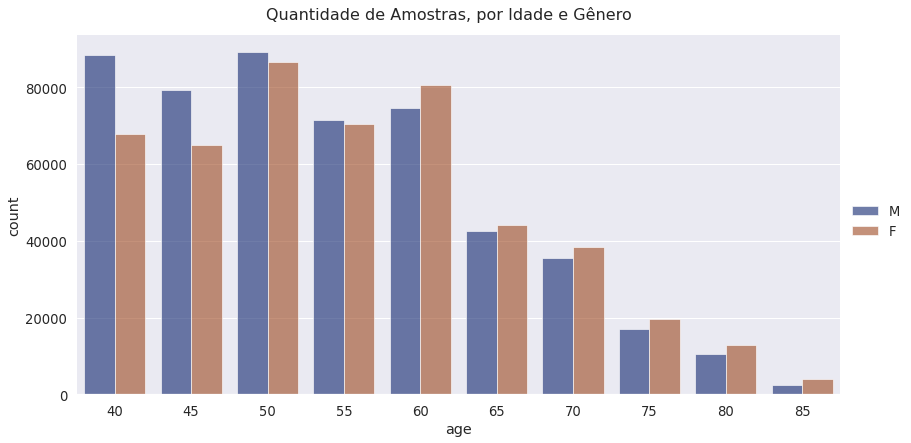

In [82]:
g = sns.catplot(
    data=data, kind="count", x="age", hue="gender",
    ci="sd", palette="dark", alpha=.6, height=6, aspect=2
)
seaborn_plot(g, title='Quantidade de Amostras, por Idade e Gênero')

### Distribuição de homens e mulheres

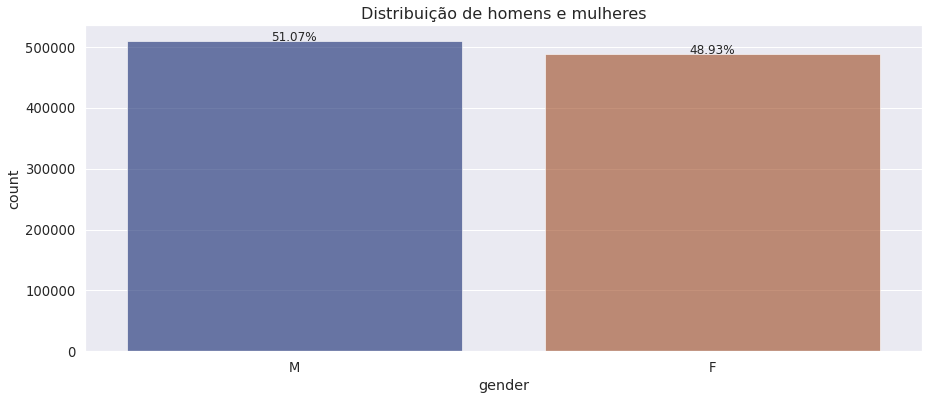

In [83]:
seaborn_bar(data, x='gender', title='Distribuição de homens e mulheres')

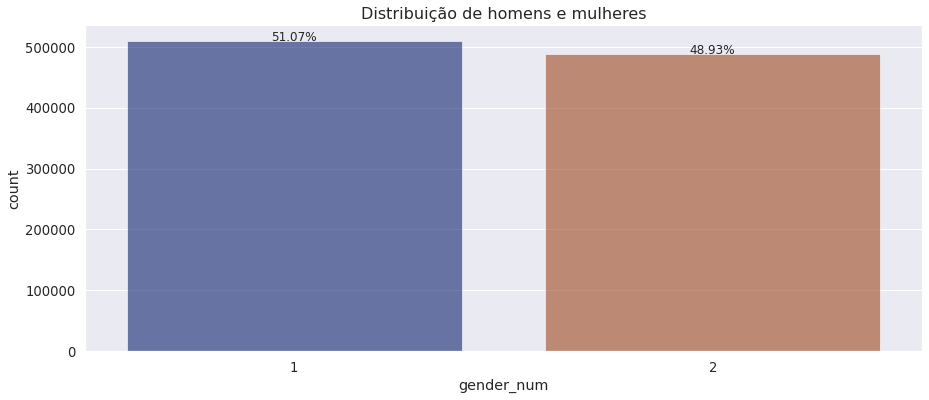

In [84]:
seaborn_bar(data, x='gender_num', title='Distribuição de homens e mulheres')

### Índice de Massa Corporal, por Idade e Gênero

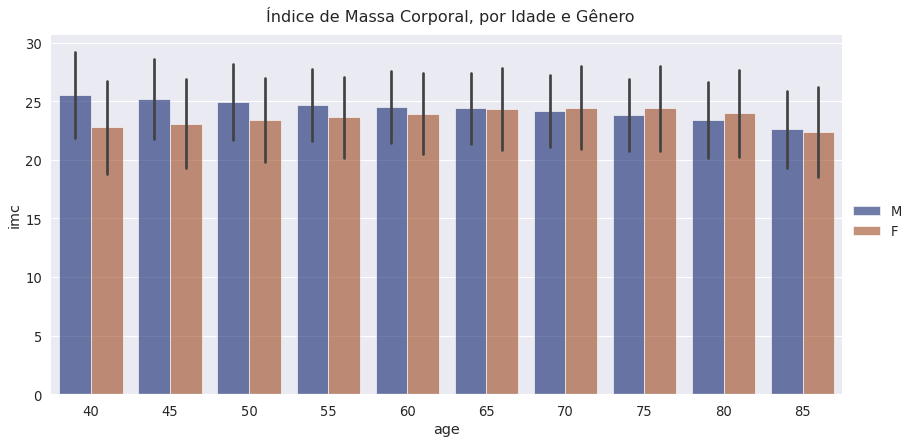

In [85]:
g = sns.catplot(
    data=data, kind="bar",
    x="age", y="imc", hue="gender",
    ci="sd", palette="dark", alpha=.6, height=6, aspect=2
)
seaborn_plot(g, title='Índice de Massa Corporal, por Idade e Gênero')

### Fumantes, por Status e Gênero

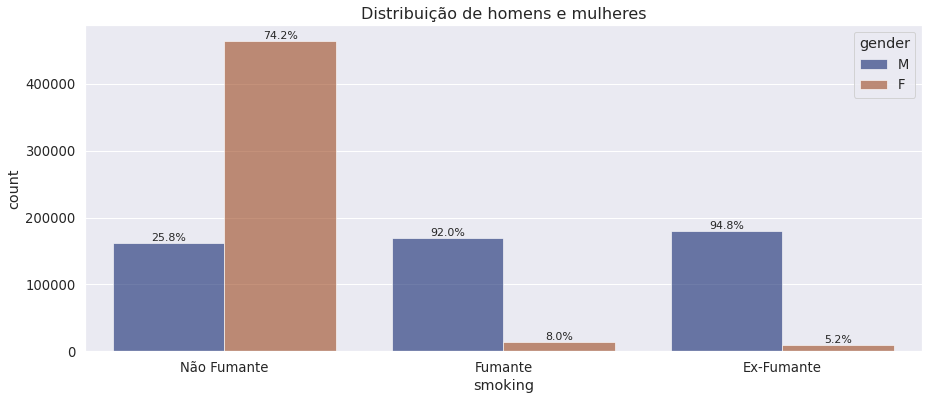

In [87]:
seaborn_bar_hue(data, x='smoking', hue='gender', title='Distribuição de homens e mulheres',
               labels=[['EX', 'Ex-Fumante'], ['NF', 'Não Fumante'], ['FU', 'Fumante']])

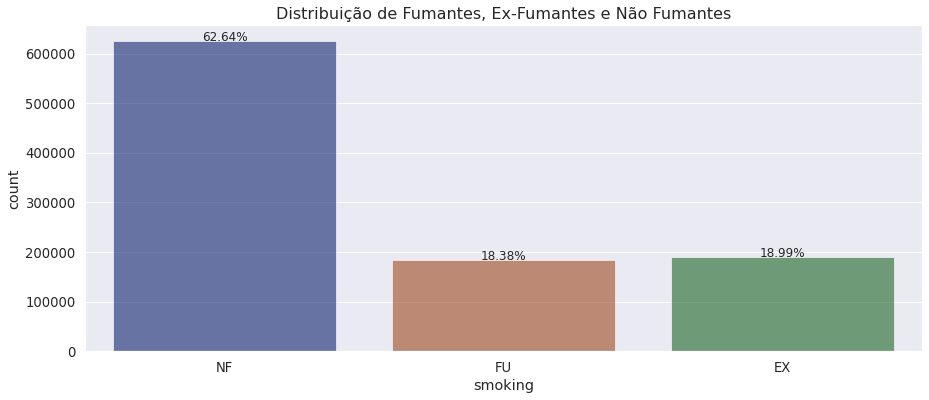

In [72]:
seaborn_bar(data, x='smoking', title='Distribuição de Fumantes, Ex-Fumantes e Não Fumantes')

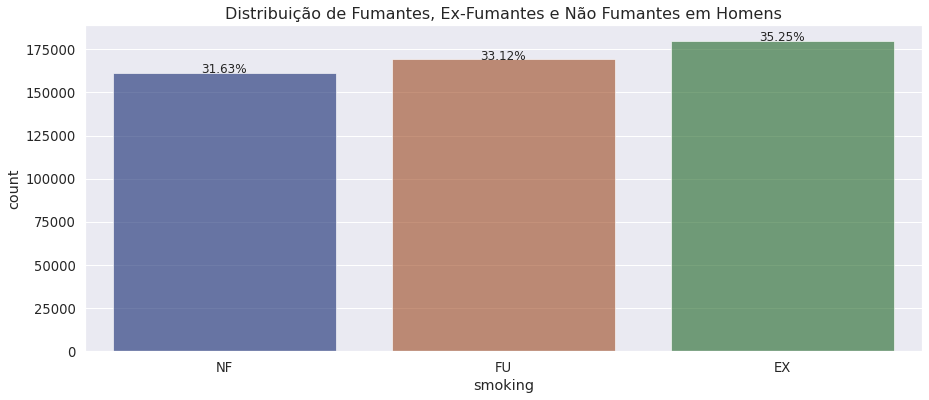

In [73]:
seaborn_bar(data[data.gender == 'M'], x='smoking', 
            title='Distribuição de Fumantes, Ex-Fumantes e Não Fumantes em Homens')

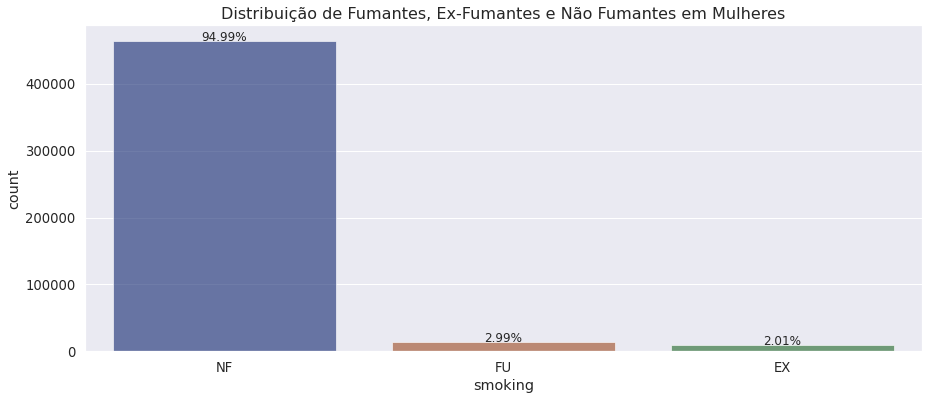

In [74]:
seaborn_bar(data[data.gender == 'F'], x='smoking', 
            title='Distribuição de Fumantes, Ex-Fumantes e Não Fumantes em Mulheres')

### Quantidade de Fumantes Masculinos, por Idade

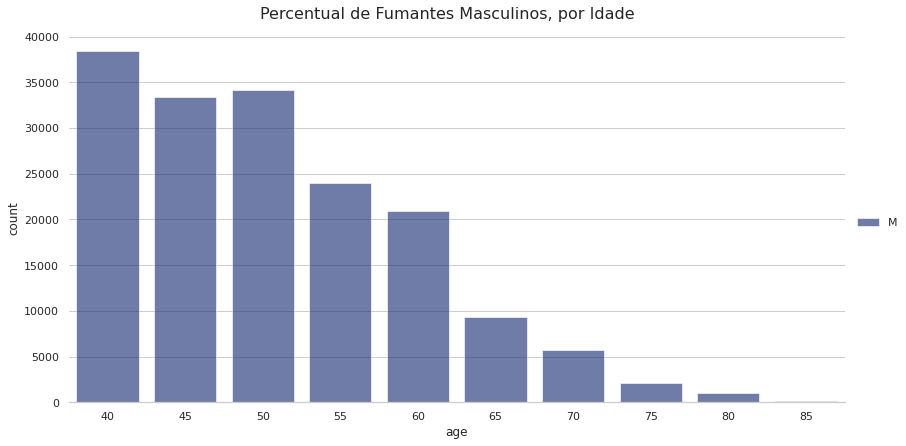

In [16]:
graph_data = data[(data.gender == 'M') & (data.smoking == 'FU')]

g = sns.catplot(
    data=graph_data, kind="count", x="age", hue="gender",
    ci="sd", palette="dark", alpha=.6, height=6, aspect=2
)

seaborn_plot(g, title='Percentual de Fumantes Masculinos, por Idade')

### Distribuição de Fumantes Masculinos, por Idade

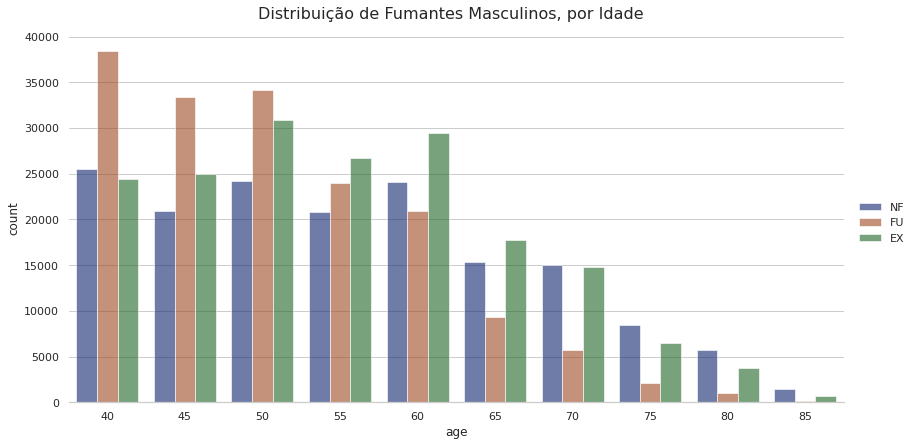

In [17]:
g = sns.catplot(
    data=data[(data.gender == 'M')], kind="count", x="age", hue="smoking",
    ci="sd", palette="dark", alpha=.6, height=6, aspect=2
)       
seaborn_plot(g, title='Distribuição de Fumantes Masculinos, por Idade')

### Distribuição de Fumantes Femininos, por Idade

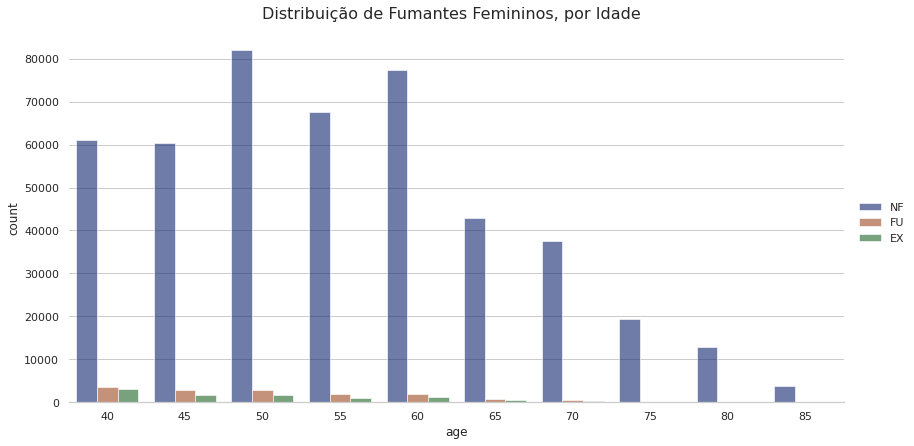

In [18]:
g = sns.catplot(
    data=data[(data.gender == 'F')], kind="count", x="age", hue="smoking",
    ci="sd", palette="dark", alpha=.6, height=6, aspect=2
)       
seaborn_plot(g, title='Distribuição de Fumantes Femininos, por Idade')

### Distribuição de Consumo de Álcool, por Gênero

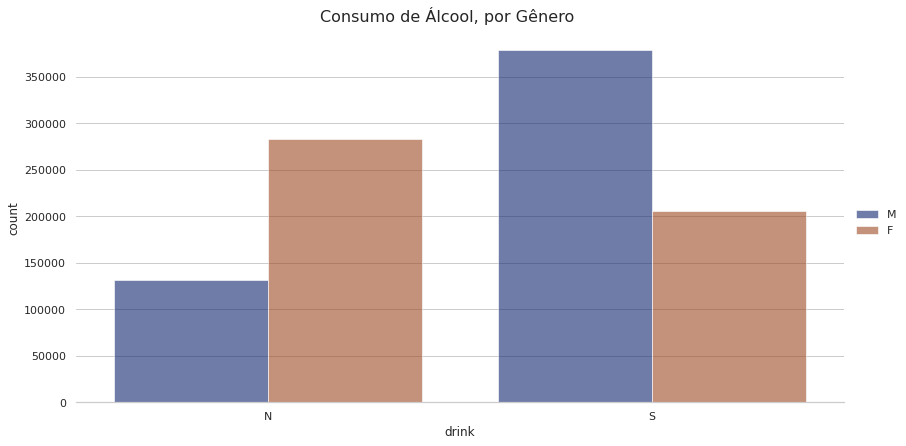

In [19]:
g = sns.catplot(
    data=data[(data.drink == 'N') | (data.drink == 'S')], kind="count", x="drink", hue="gender",
    ci="sd", palette="dark", alpha=.6, height=6, aspect=2
)
seaborn_plot(g, title='Consumo de Álcool, por Gênero')

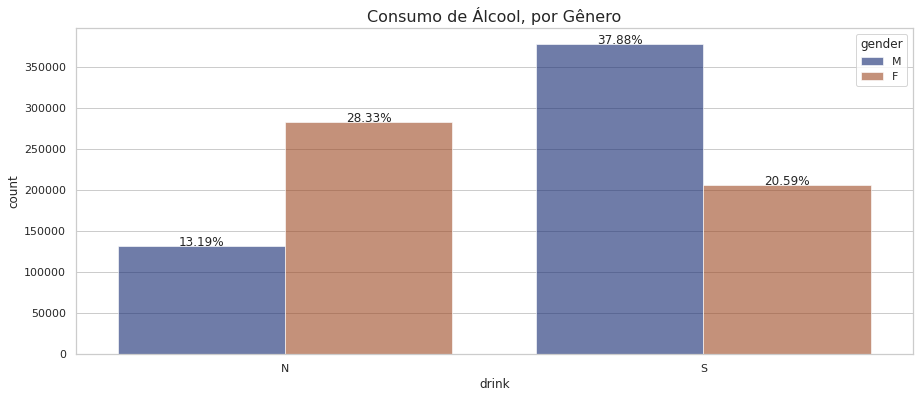

In [20]:
totals = data.gender.value_counts()
n_hues = 2

dt = data[(data.drink == 'N') | (data.drink == 'S')]

plt.figure(figsize = (15,6))
ax = sns.countplot(x=dt["drink"], hue=dt["gender"], palette="dark", alpha=.6)
plt.title("Consumo de Álcool, por Gênero",fontsize=16)

for p in ax.patches:
    height = p.get_height()
    value = height / sum(data.gender.value_counts())
    ax.text(p.get_x()+p.get_width()/2., height + 20, 
           '{0:.2%}'.format(value), ha="center", fontsize=12)

### Correlação entre Idade, Nível de Glicose, consumo de Tabaco e Gênero

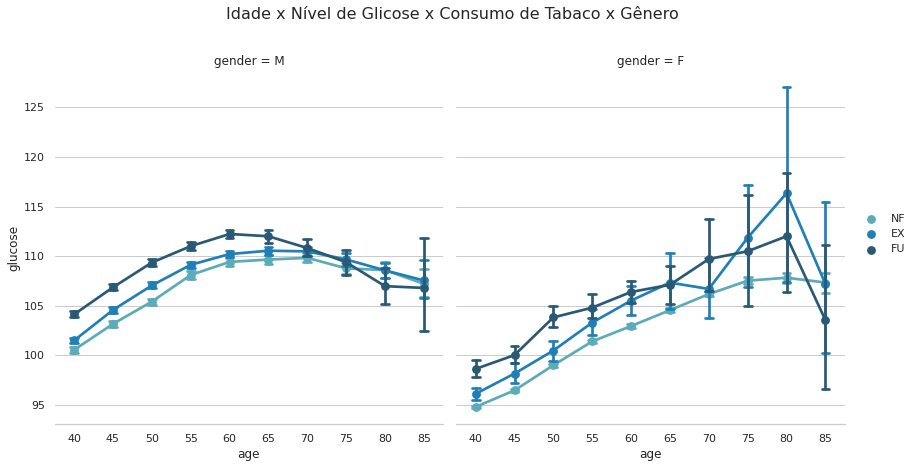

In [21]:
smoking_dt = data[(data["smoking"] != "")]

g = sns.catplot(x="age", y="glucose", hue="smoking", col="gender",
                hue_order=['NF','EX','FU'],
                capsize=.2, palette="YlGnBu_d", height=6, aspect=1.,
                kind="point", data=smoking_dt)

seaborn_plot(g, title='Idade x Nível de Glicose x Consumo de Tabaco x Gênero', title_pos=1.08)

### Correlação entre Idade, Pressão Sistólica, consumo de Tabaco e Gênero

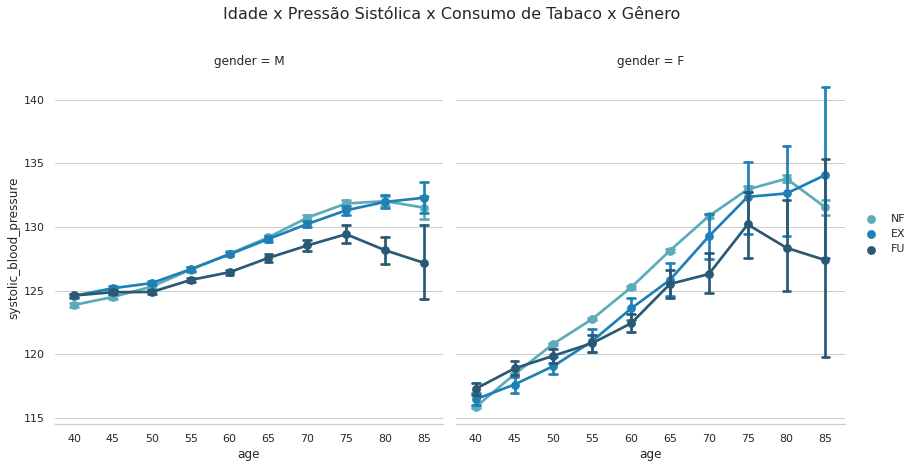

In [22]:
smoking_dt = data[(data["smoking"] != "")]

g = sns.catplot(x="age", y="systolic_blood_pressure", hue="smoking", col="gender",
                hue_order=['NF','EX','FU'],
                capsize=.2, palette="YlGnBu_d", height=6, aspect=1.,
                kind="point", data=smoking_dt)

seaborn_plot(g, title='Idade x Pressão Sistólica x Consumo de Tabaco x Gênero', title_pos=1.08)

### Correlação entre Idade, Pressão, consumo de Tabaco e Gênero

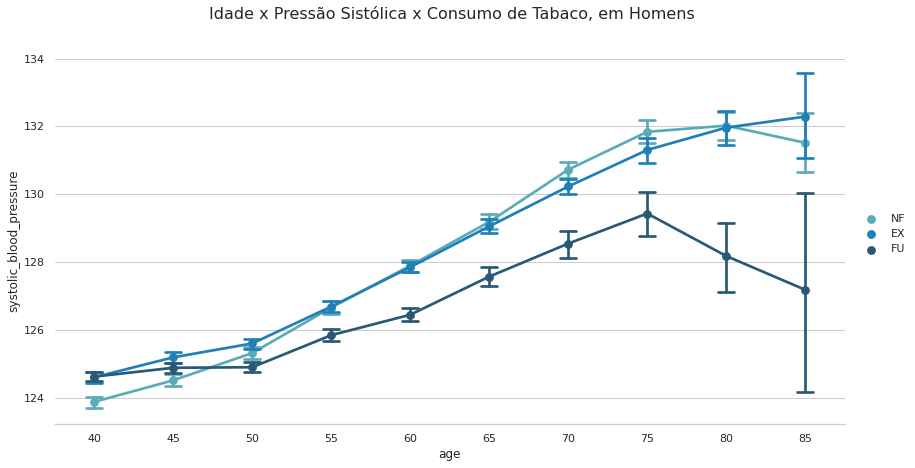

In [23]:
smoking_dt = data.query('smoking != "" and gender == "M"')

g = sns.catplot(x="age", y="systolic_blood_pressure", hue="smoking",
                hue_order=['NF','EX','FU'],
                capsize=.2, palette="YlGnBu_d", height=6, aspect=2.,
                kind="point", data=smoking_dt)

seaborn_plot(g, title='Idade x Pressão Sistólica x Consumo de Tabaco, em Homens', title_pos=1.08)

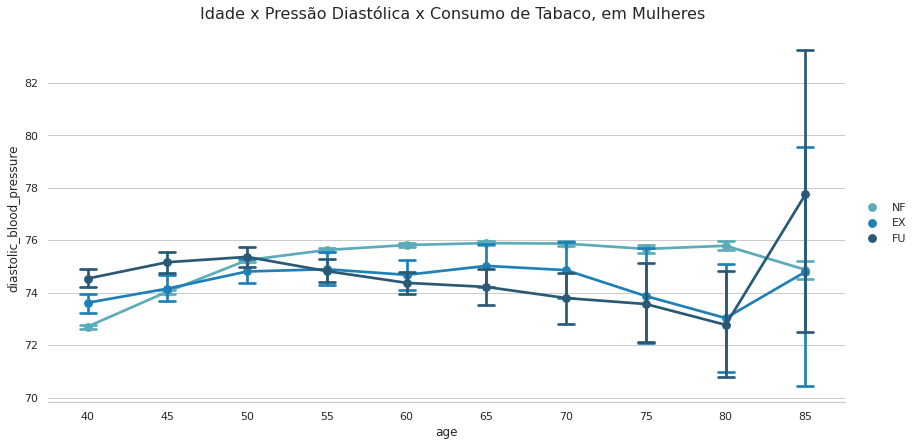

In [24]:
smoking_dt = data.query('smoking != "" and gender == "F"')

g = sns.catplot(x="age", y="diastolic_blood_pressure", hue="smoking",
                hue_order=['NF','EX','FU'],
                capsize=.2, palette="YlGnBu_d", height=6, aspect=2.,
                kind="point", data=smoking_dt)

seaborn_plot(g, title='Idade x Pressão Diastólica x Consumo de Tabaco, em Mulheres')

### Correlação entre Idade, Pressão e IMC

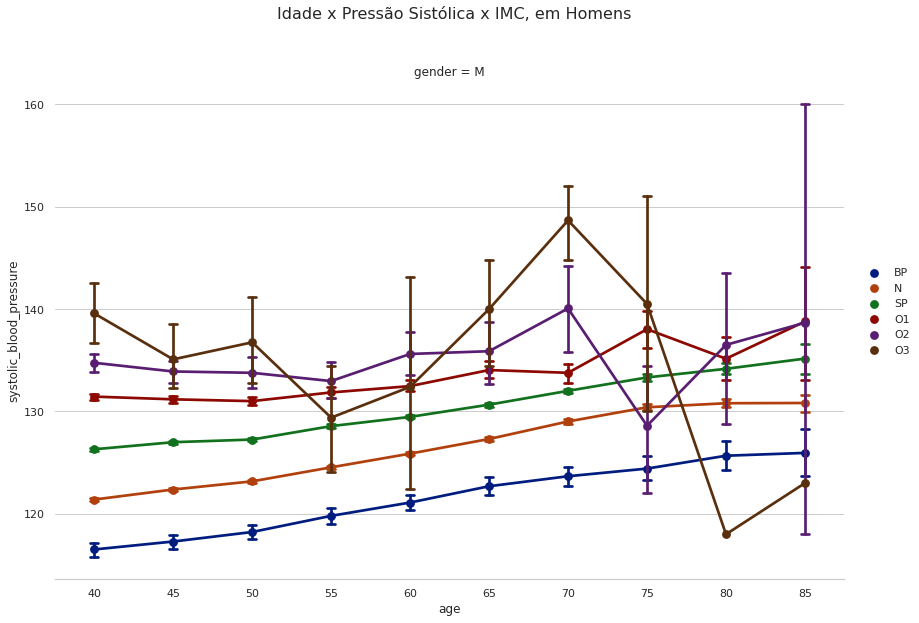

In [25]:
g = sns.catplot(x="age", y="systolic_blood_pressure", hue="imc_grau", col="gender",
                hue_order=['BP','N','SP','O1','O2','O3'],
                capsize=.1, palette="dark", height=8, aspect=1.5, alpha=.6,
                kind="point", data=data[data.gender == 'M'])

seaborn_plot(g, title='Idade x Pressão Sistólica x IMC, em Homens', title_pos=1.08)

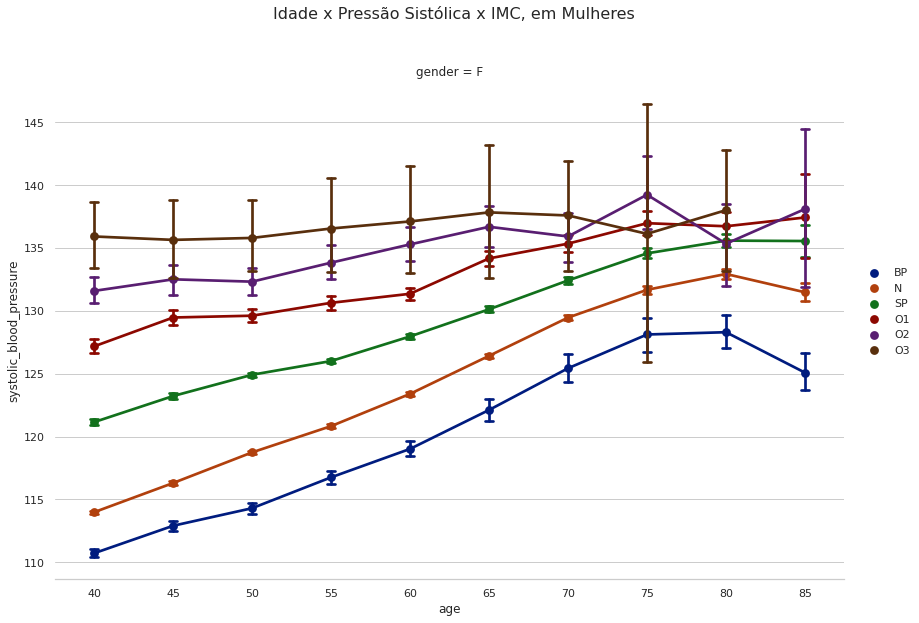

In [26]:
g = sns.catplot(x="age", y="systolic_blood_pressure", hue="imc_grau", col="gender",
                hue_order=['BP','N','SP','O1','O2','O3'],
                capsize=.1, palette="dark", height=8, aspect=1.5, alpha=.6,
                kind="point", data=data[data.gender == 'F'])

seaborn_plot(g, title='Idade x Pressão Sistólica x IMC, em Mulheres', title_pos=1.08)

### Correlação entre Idade, Triglicérides e IMC

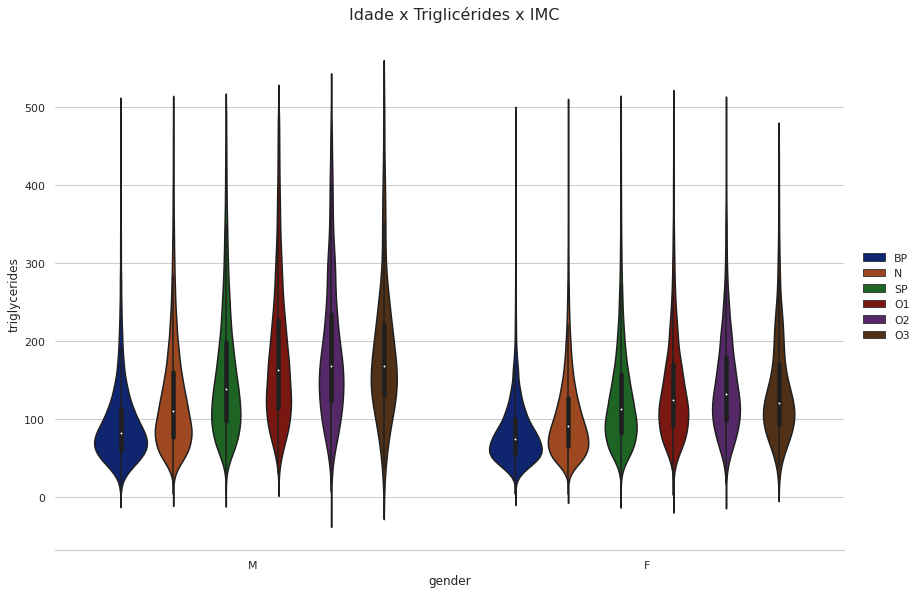

In [27]:
g = sns.catplot(x="gender", y="triglycerides", hue="imc_grau", 
                hue_order=['BP','N','SP','O1','O2','O3'],
                palette="dark", height=8, aspect=1.5, alpha=.6, 
                kind="violin", data=data[data["triglycerides"] <= 500])

seaborn_plot(g, title='Idade x Triglicérides x IMC', title_pos=1.03)

### Correlação entre Idade, Colesterol Total e IMC

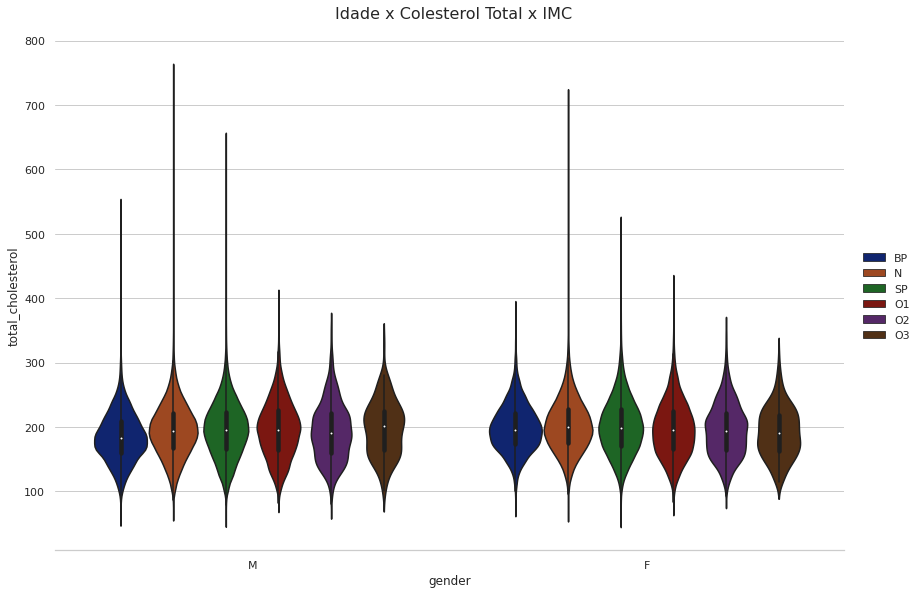

In [28]:
g = sns.catplot(x="gender", y="total_cholesterol", hue="imc_grau", 
                hue_order=['BP','N','SP','O1','O2','O3'],
                palette="dark", height=8, aspect=1.5, alpha=.6, 
                kind="violin", data=data[data["total_cholesterol"] <= 1000])

seaborn_plot(g, title='Idade x Colesterol Total x IMC', title_pos=1.03)

### Correlação entre Hemoglobina, Gênero e Consumo de Cigarro

Text(0.5, 1.0, 'Hemoglobina x Gênero x Consumo Cigarro')

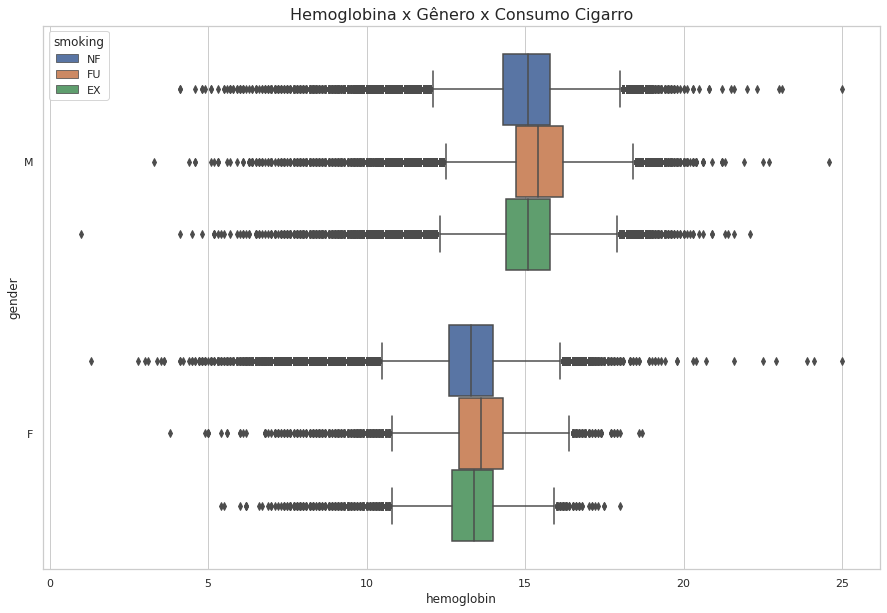

In [29]:
plt.figure(figsize = (15,10))
ax = sns.boxplot(data=data[(data.smoking != "")], x="hemoglobin", y="gender", hue="smoking")
plt.title("Hemoglobina x Gênero x Consumo Cigarro",fontsize=16)

### Correlação entre Creatinina, Gênero e Consumo de Cigarro

Text(0.5, 1.0, 'Creatinina x Gênero x Consumo Cigarro')

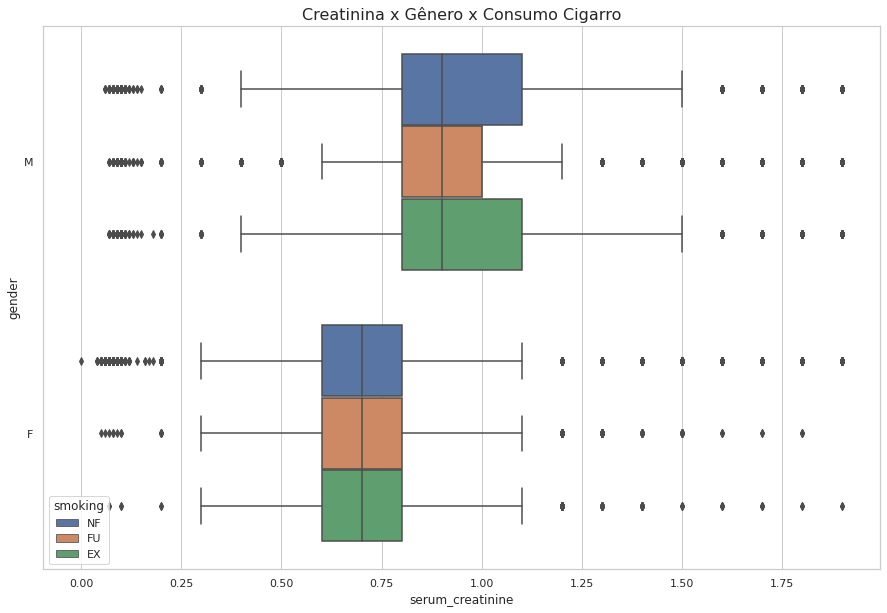

In [30]:
plt.figure(figsize = (15,10))
ax = sns.boxplot(data=data.query('smoking != "" and serum_creatinine < 2'), 
                 x="serum_creatinine", y="gender", hue="smoking")
plt.title("Creatinina x Gênero x Consumo Cigarro",fontsize=16)

### Correlação entre Gama GT, Gênero e Consumo de Cigarro

Text(0.5, 1.0, 'Gama GT x Gênero x Consumo Cigarro')

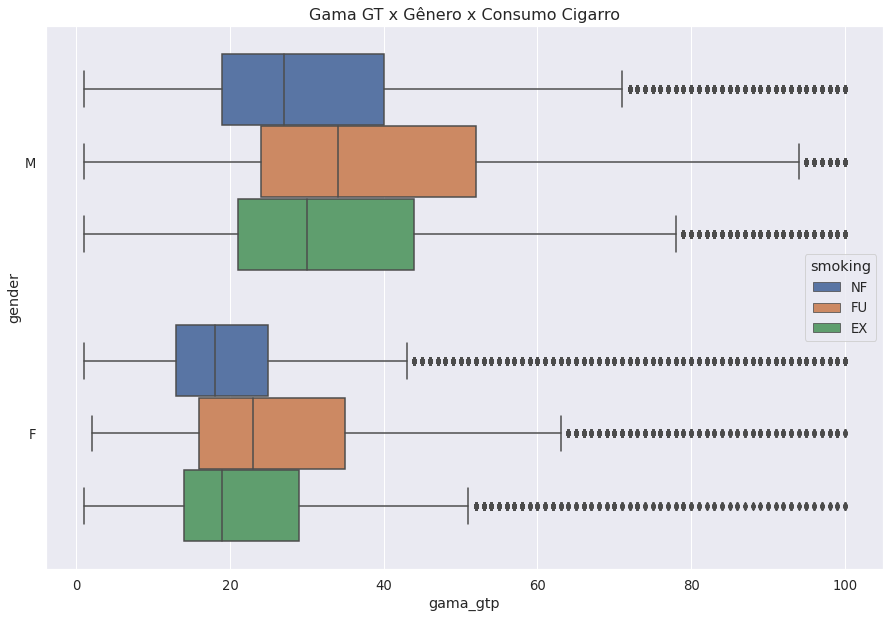

In [31]:
plt.figure(figsize = (15,10))
sns.set(font_scale=1.2)
ax = sns.boxplot(data=data[(data.smoking != "") & (data.gama_gtp <= 100)], 
                 x="gama_gtp", y="gender", hue="smoking")
plt.title("Gama GT x Gênero x Consumo Cigarro",fontsize=16)

Text(0.5, 1.0, 'Colesterol LDL x Gênero x Consumo Cigarro')

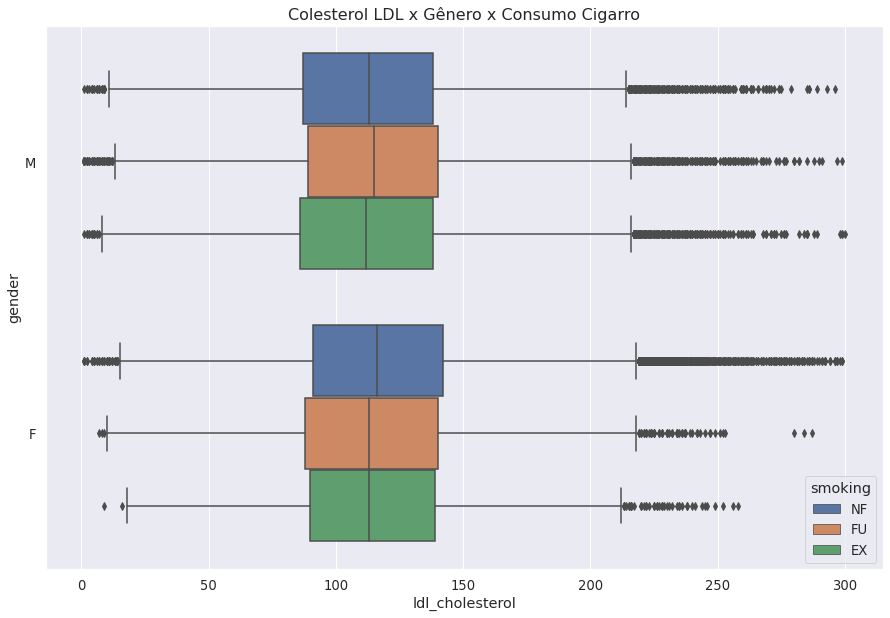

In [32]:
plt.figure(figsize = (15,10))
sns.set(font_scale=1.2)
ax = sns.boxplot(data=data[(data.smoking != "") & (data.ldl_cholesterol <= 300)], 
                 x="ldl_cholesterol", y="gender", hue="smoking")
plt.title("Colesterol LDL x Gênero x Consumo Cigarro",fontsize=16)

### Correlação entre Colesterol Total, Colest. HDL, Colest. LDL, Triglicérides e Glicose, em Fumantes

<Figure size 1080x1080 with 0 Axes>

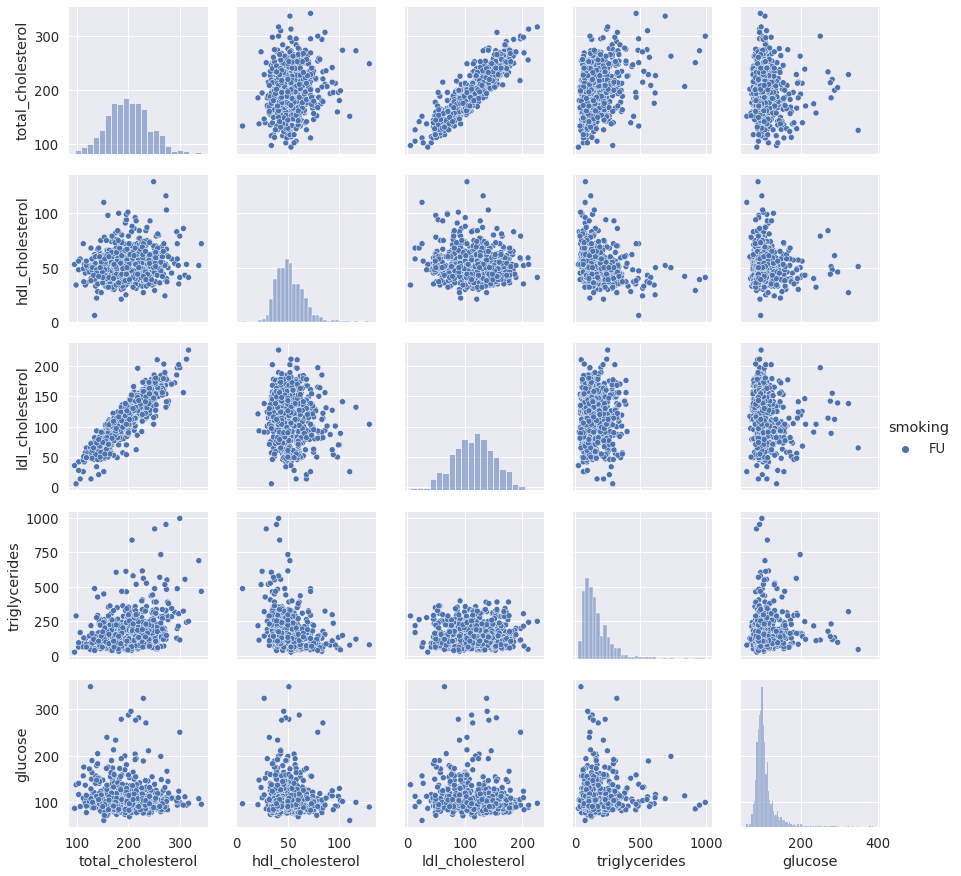

In [33]:
sample_data = data[['total_cholesterol', 'hdl_cholesterol', 'ldl_cholesterol', 
                    'triglycerides', 'glucose', 'smoking']].sample(frac=0.01)

plt.figure(figsize = (15,15))
g = sns.PairGrid(sample_data[sample_data.smoking == 'FU'], hue="smoking")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

### Correlação entre Colesterol Total, Colest. HDL, Colest. LDL, Triglicérides e Glicose, em Não Fumantes

<Figure size 1080x1080 with 0 Axes>

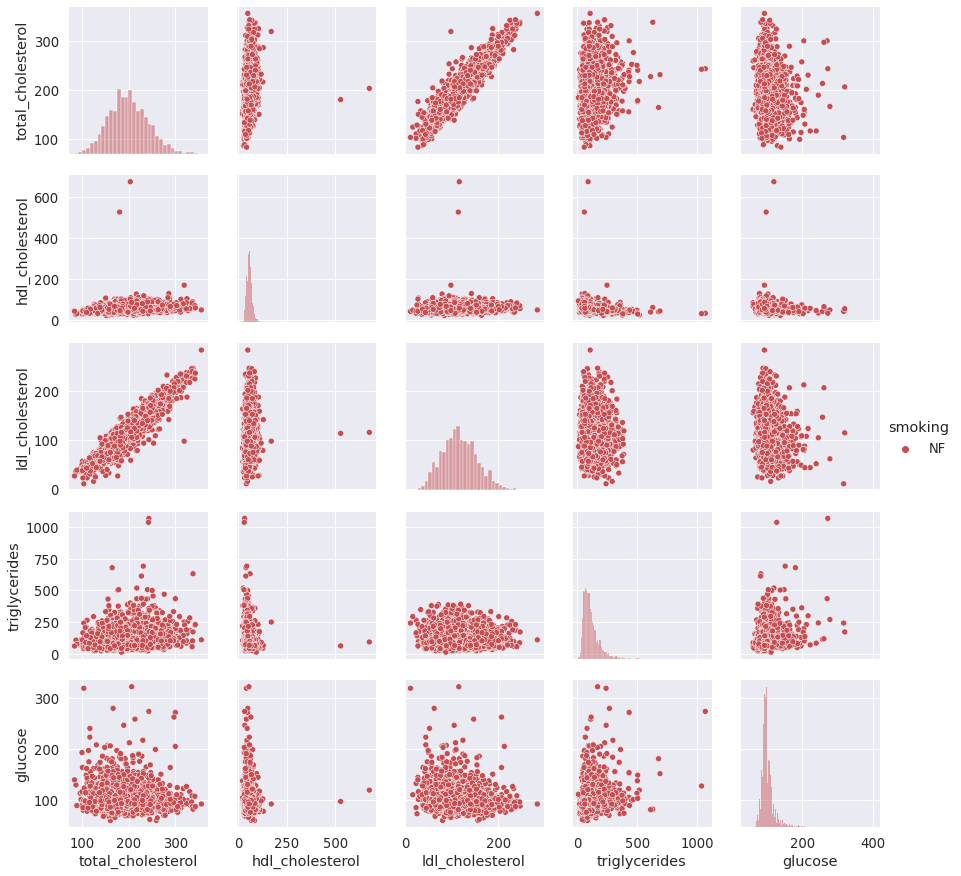

In [34]:
sample_data = data[['total_cholesterol', 'hdl_cholesterol', 'ldl_cholesterol', 
                    'triglycerides', 'glucose', 'smoking']].sample(frac=0.01)

plt.figure(figsize = (15,15))
g = sns.PairGrid(sample_data[sample_data.smoking == 'NF'], hue="smoking", palette=['r'])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

### Correlação entre Pressão, Colesterol Total, Triglicérides e Glicose

<Figure size 1080x1080 with 0 Axes>

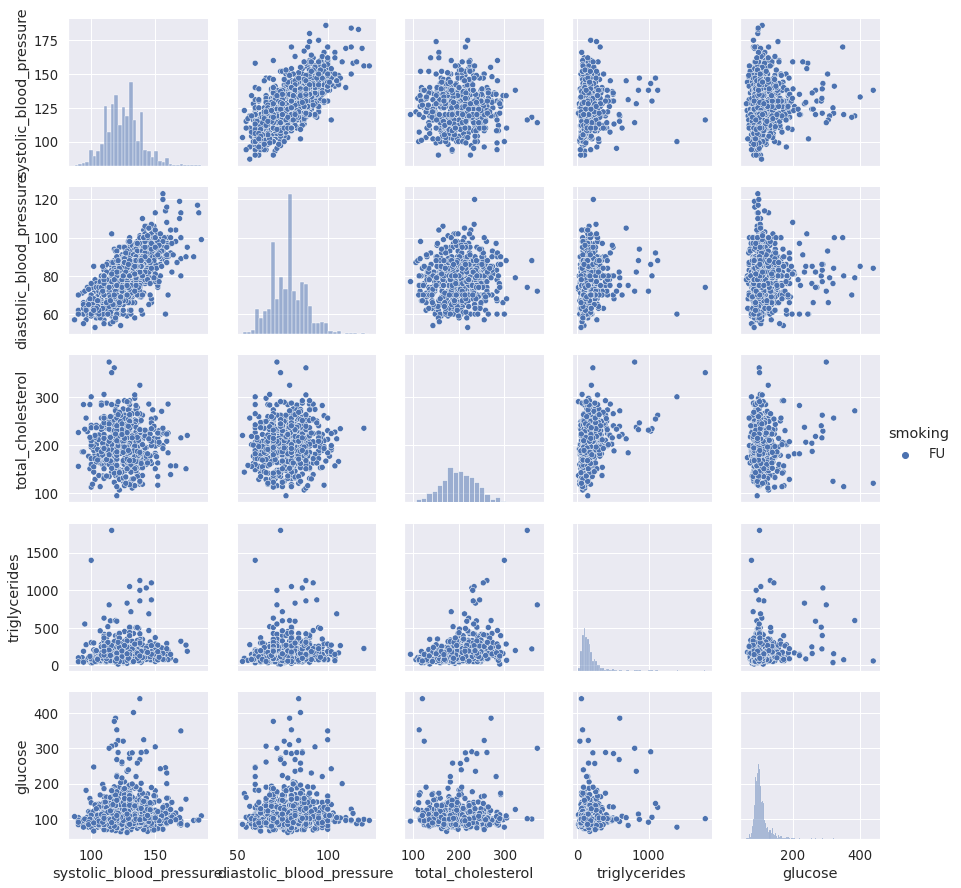

In [35]:
sample_data = data[['systolic_blood_pressure', 'diastolic_blood_pressure', 'total_cholesterol', 
                    'triglycerides', 'glucose', 'smoking']].sample(frac=0.01)

plt.figure(figsize = (15,15))
g = sns.PairGrid(sample_data[sample_data.smoking == 'FU'], hue="smoking")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

### Correlação entre AST SGOT, ALT SGPT, Gama Gt, Hemoglobina e Consumo de Cigarro

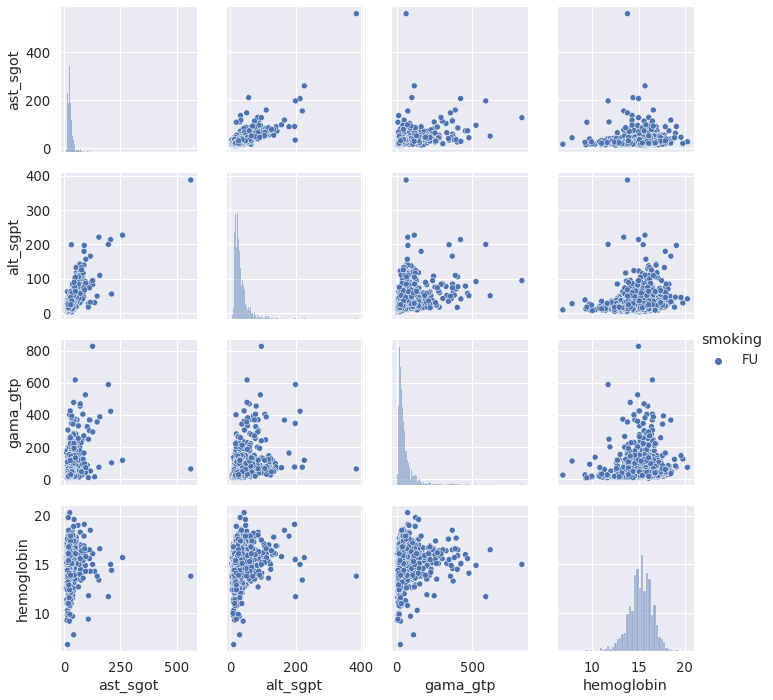

In [36]:
sample_data = data[['ast_sgot', 'alt_sgpt', 'gama_gtp', 'hemoglobin', 'smoking']].sample(frac=0.01)

g = sns.PairGrid(sample_data[sample_data.smoking == 'FU'], hue="smoking")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

### Correlação entre AST SGOT, ALT SGPT, Gama Gt, Hemoglobina e Consumo de Bebida

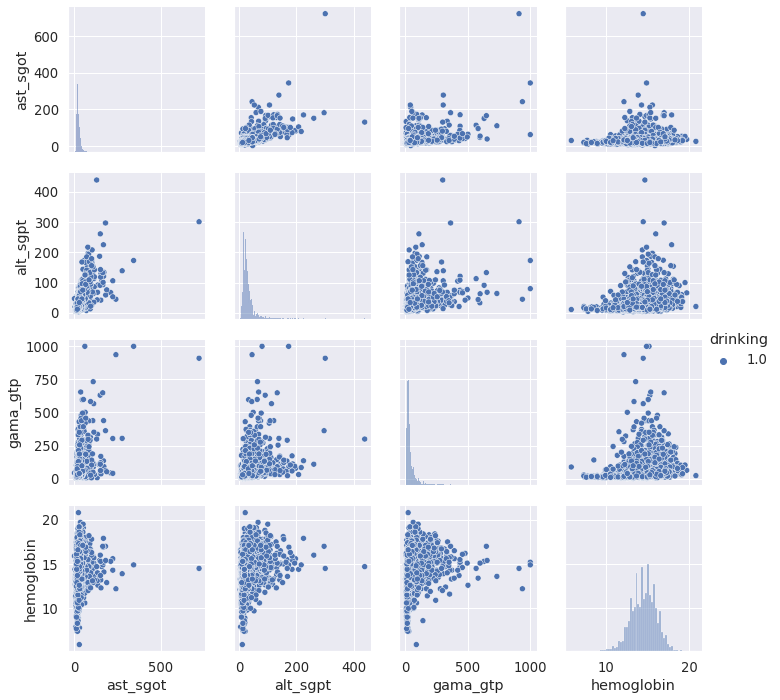

In [37]:
sample_data = data[['ast_sgot', 'alt_sgpt', 'gama_gtp', 'hemoglobin', 'drinking']].sample(frac=0.01)

g = sns.PairGrid(sample_data[sample_data.drinking == 1.], hue="drinking")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

---
## Resumo Análise Exploratória

Ao gerar os gráficos foi possível perceber que existem muitos *outliers* no banco de dados.
Informações relativas à colesterol e triglicérides, precisaram ser filtradas previamente, para que fosse possível observar os dados de forma adequada.

Além disso, alguns grupos que não contém informações, como pessoas sem status de fumantes, possuem poucos registros e comportamento variado, indicando que as informações possam ser removidas.